## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import norm
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0, 20)
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
y = -1 * x + 2
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

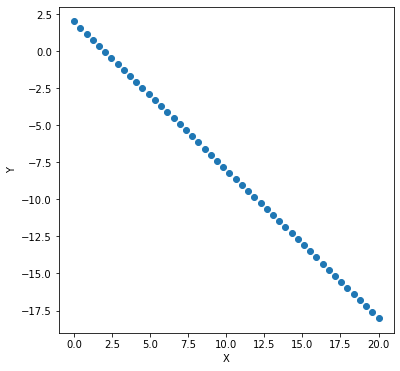

In [4]:
plt.figure(figsize=(6,6));
plt.scatter(x,y);
plt.xlabel("X");
plt.ylabel("Y");

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

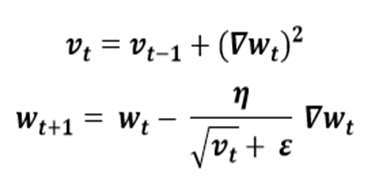

In [5]:
def AdaGrad(inputs, outputs, learning_rate, epsolin, max_epochs):
        
    x0 = np.ones(len(inputs))
    theta_0 = 0
    theta_1 = 0
    
    DeltaJ_theta_0 = 1
    DeltaJ_theta_1 = 1
    
    Vt_theta_0 = 0
    Vt_theta_1 = 0
    
    Loss_Function = []
    thetas_0 = []
    thetas_1 = []
    hs = []
    
    for i in range (max_epochs):

        #Hypothesis Function
        h = (np.array([x0, inputs]).T) @ (np.array([theta_0, theta_1]).T)
        hs.append(h)
        
        #Loss Function
        J = (1/(2 * len(inputs))) * (norm(h-outputs)**2)
        Loss_Function.append(J)

        #Gradiants
        DeltaJ_theta_0 = (1 / len(inputs)) * ((h - outputs) @ x0)
        DeltaJ_theta_1 = (1 / len(inputs)) * ((h - outputs) @ inputs)
        
        #Vt values
        Vt_theta_0 = Vt_theta_0 + (DeltaJ_theta_0 ** 2)
        Vt_theta_1 = Vt_theta_1 + (DeltaJ_theta_1 ** 2)
        
        #New Thetas
        theta_0 = theta_0 - ((learning_rate / (np.sqrt(Vt_theta_0) + epsolin)) * DeltaJ_theta_0)
        theta_1 = theta_1 - ((learning_rate / (np.sqrt(Vt_theta_1) + epsolin)) * DeltaJ_theta_1)

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        
        if abs(DeltaJ_theta_0) <= 0.001 and abs(DeltaJ_theta_1) <= 0.001:
            break
        
    return theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs

#### Trial 1

In [6]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = AdaGrad(x, y, 0.01, 10 ** -4, 1000)

In [7]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = -0.49650864086374824
Theta 1 = -0.5117671177144054
R2 Score = -0.5396307523505421


In [8]:
epochs = list(range(1, len(Loss_Function)+1))

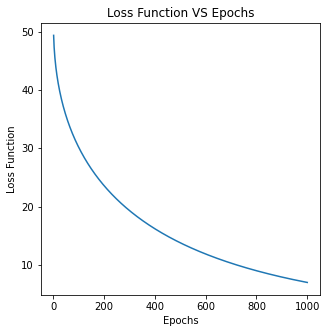

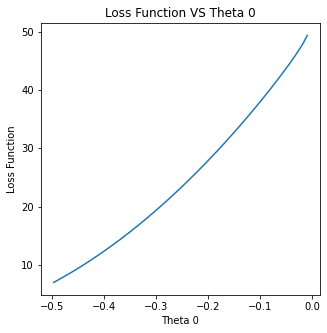

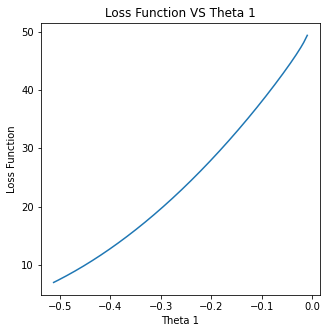

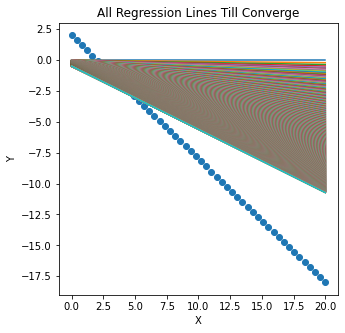

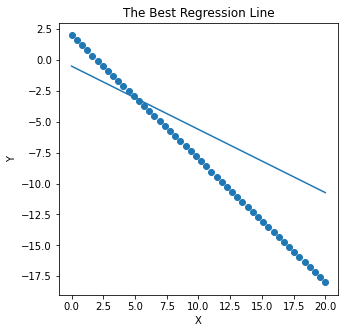

In [9]:
#Plots

#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

#### Trial 2

In [10]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = AdaGrad(x, y, 0.3, 10 ** -6, 100)

In [11]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.5526430104389062
Theta 1 = -0.8898401211762834
R2 Score = 0.9800299465595964


In [12]:
epochs = list(range(1, len(Loss_Function)+1))

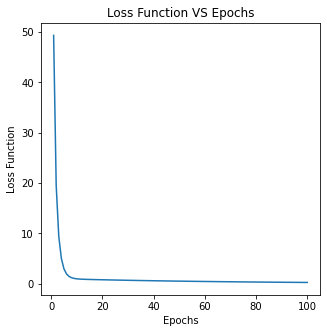

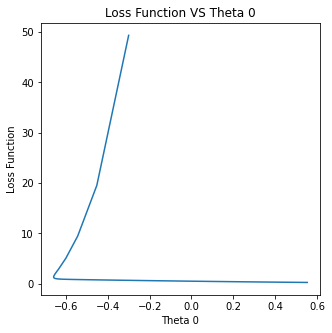

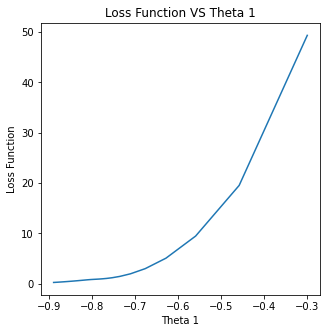

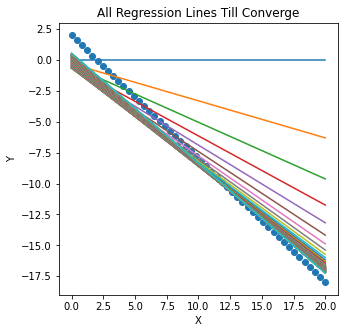

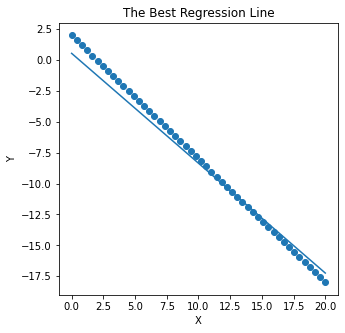

In [13]:
#Plots

#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

#### Trial 3

In [14]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = AdaGrad(x, y, 0.1, 10 ** -8, 10000)

In [15]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 1.995837214155875
Theta 1 = -0.999683592952499
R2 Score = 0.9999998707901494


In [16]:
epochs = list(range(1, len(Loss_Function)+1))

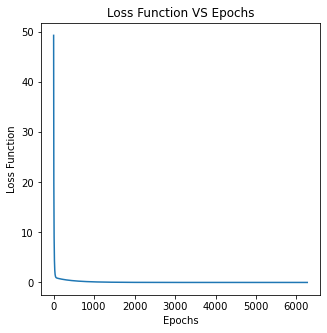

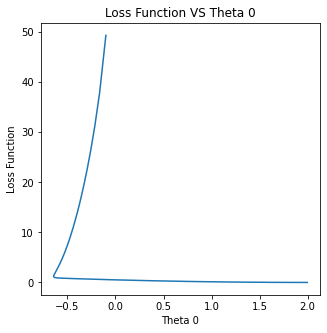

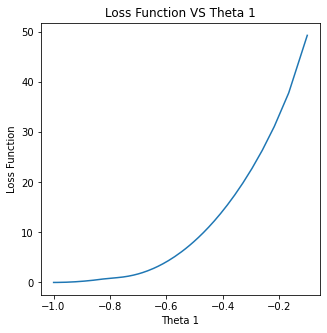

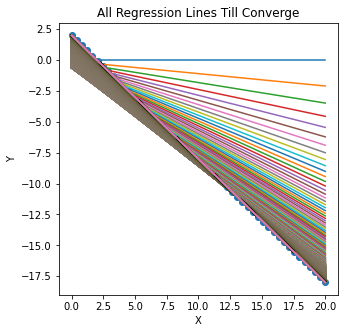

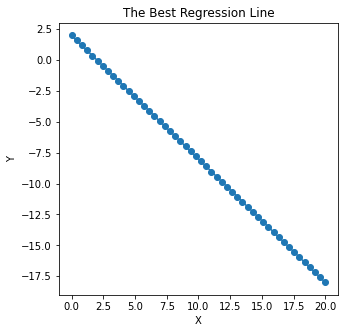

In [17]:
#Plots

#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

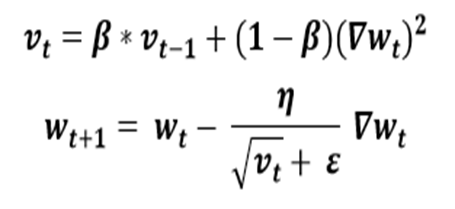

In [18]:
def RMSProp(inputs, outputs, learning_rate, beta, epsolin, max_epochs):

    x0 = np.ones(len(inputs))
    theta_0 = 0
    theta_1 = 0
    
    DeltaJ_theta_0 = 1
    DeltaJ_theta_1 = 1
    
    Vt_theta_0 = 0
    Vt_theta_1 = 0
    
    one_m_beta= 1 - beta
    
    Loss_Function = []
    thetas_0 = []
    thetas_1 = []
    hs = []
    
    for i in range (max_epochs):

        #Hypothesis Function
        h = (np.array([x0, inputs]).T) @ (np.array([theta_0, theta_1]).T)
        hs.append(h)
        
        #Loss Function
        J = (1/(2 * len(inputs))) * (norm(h-outputs)**2)
        Loss_Function.append(J)

        #Gradiants
        DeltaJ_theta_0 = (1 / len(inputs)) * ((h - outputs) @ x0)
        DeltaJ_theta_1 = (1 / len(inputs)) * ((h - outputs) @ inputs)
        
        #Vt values
        Vt_theta_0 = beta * Vt_theta_0 + one_m_beta * (DeltaJ_theta_0 ** 2)
        Vt_theta_1 = beta * Vt_theta_1 + one_m_beta * (DeltaJ_theta_1 ** 2)
        
        #New Thetas
        theta_0 = theta_0 - ((learning_rate / (np.sqrt(Vt_theta_0) + epsolin)) * DeltaJ_theta_0)
        theta_1 = theta_1 - ((learning_rate / (np.sqrt(Vt_theta_1) + epsolin)) * DeltaJ_theta_1)

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        
        if abs(DeltaJ_theta_0) <= 0.001 and abs(DeltaJ_theta_1) <= 0.001:
            break
        
    return theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs

#### Trial 1

In [19]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = RMSProp(x, y, 0.1, 0.1, 10 ** -4, 1000)

In [20]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 2.0494728469462227
Theta 1 = -0.9499613061525025
R2 Score = 0.9898236679183886


In [21]:
epochs = list(range(1, len(Loss_Function)+1))

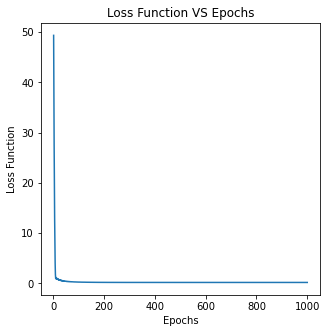

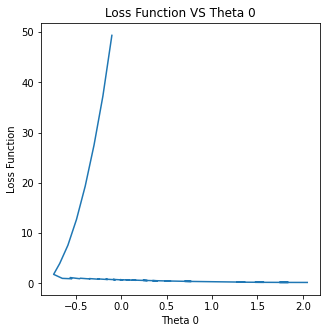

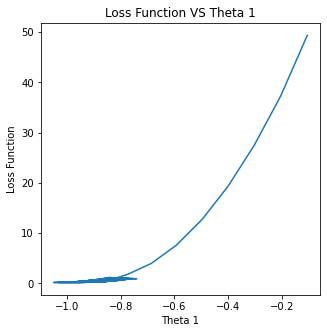

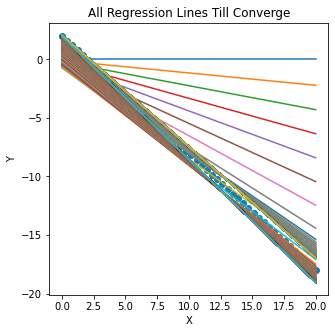

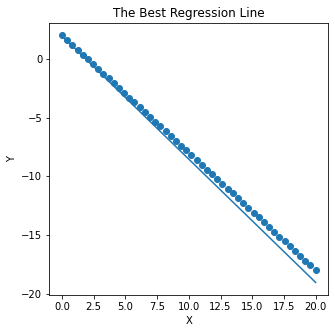

In [22]:
#Plots

#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

#### Trial 2

In [23]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = RMSProp(x, y, 0.3, 0.5, 10 ** -6, 100)

In [24]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 1.720632845060292
Theta 1 = -1.140162226610949
R2 Score = 0.8566715355622475


In [25]:
epochs = list(range(1, len(Loss_Function)+1))

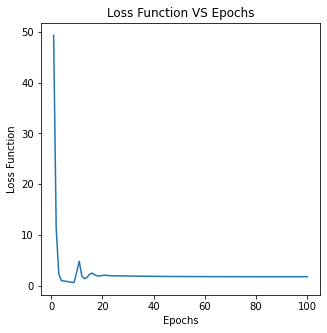

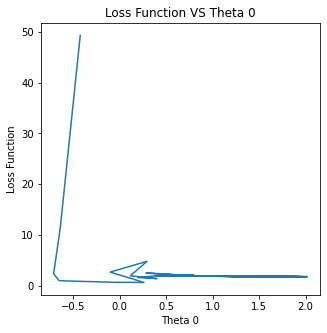

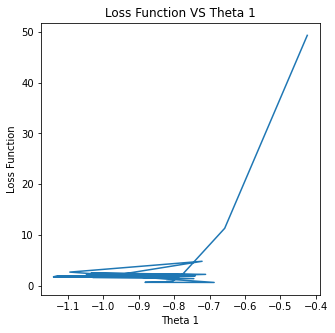

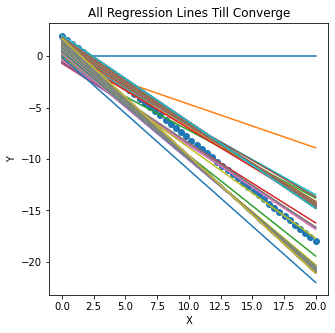

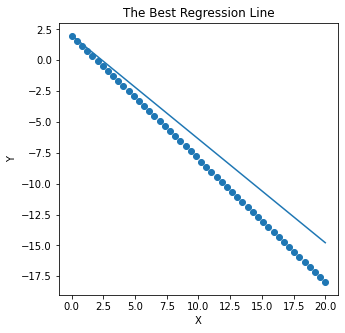

In [26]:
#Plots

#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

#### Trial 3

In [27]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = RMSProp(x, y, 0.001, 0.9, 10 ** -8, 10000)

In [28]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 2.000499999090908
Theta 1 = -0.9995000000691112
R2 Score = 0.999998879209882


In [29]:
epochs = list(range(1, len(Loss_Function)+1))

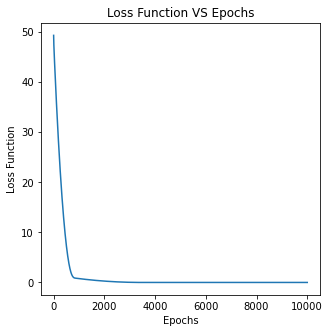

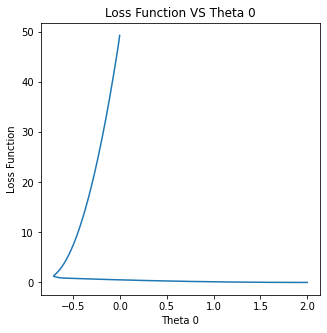

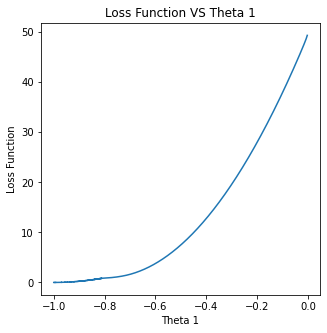

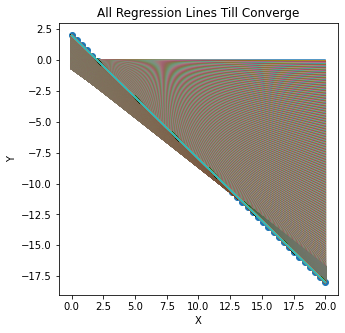

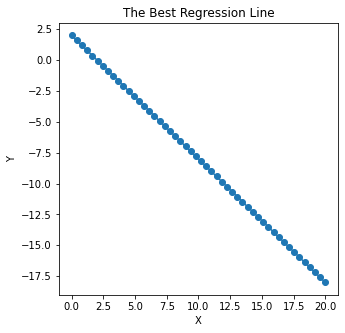

In [30]:
#Plots

#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

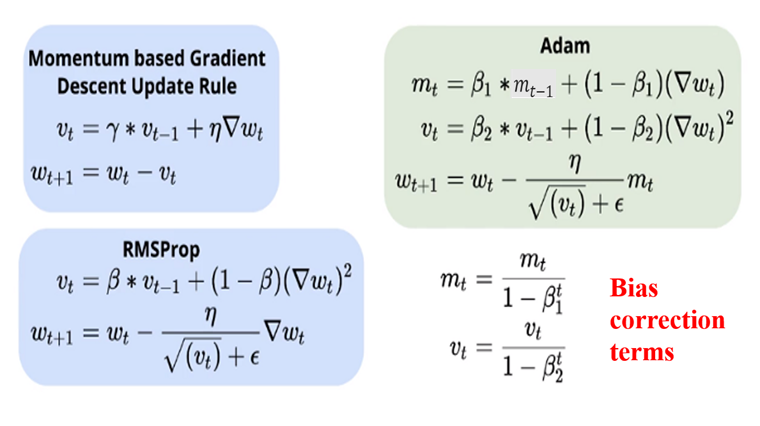

In [31]:
def Adam(inputs, outputs, learning_rate, beta_1, beta_2, epsolin, max_epochs):
    
    x0 = np.ones(len(inputs))
    theta_0 = 0
    theta_1 = 0
    
    DeltaJ_theta_0 = 1
    DeltaJ_theta_1 = 1
    
    Vt_theta_0 = 0
    Vt_theta_1 = 0
    Mt_theta_0 = 0
    Mt_theta_1 = 0
    
    one_m_beta_1 = 1 - beta_1
    one_m_beta_2 = 1 - beta_2
    
    Loss_Function = []
    thetas_0 = []
    thetas_1 = []
    hs = []
    
    counter = 0
    for i in range (max_epochs):

        #Hypothesis Function
        h = (np.array([x0, inputs]).T) @ (np.array([theta_0, theta_1]).T)
        hs.append(h)
        
        #Loss Function
        J = (1/(2 * len(inputs))) * (norm(h-outputs)**2)
        Loss_Function.append(J)

        #Gradiants
        DeltaJ_theta_0 = (1 / len(inputs)) * ((h - outputs) @ x0)
        DeltaJ_theta_1 = (1 / len(inputs)) * ((h - outputs) @ inputs)
        
        #Mt values
        Mt_theta_0 = beta_2 * Vt_theta_0 + one_m_beta_2 * DeltaJ_theta_0
        Mt_theta_1 = beta_2 * Vt_theta_1 + one_m_beta_2 * DeltaJ_theta_1
        
        #Vt values
        Vt_theta_0 = beta_1 * Vt_theta_0 + one_m_beta_1 * (DeltaJ_theta_0 ** 2)
        Vt_theta_1 = beta_1 * Vt_theta_1 + one_m_beta_1 * (DeltaJ_theta_1 ** 2)
        
        #Bias Correction
        counter += 1
        Vt_denominator = 1 - beta_1**counter
        Mt_denominator = 1 - beta_2**counter

        Vt_theta_0 = Vt_theta_0 / Vt_denominator
        Vt_theta_1 = Vt_theta_1 / Vt_denominator
        Mt_theta_0 = Mt_theta_0 / Mt_denominator
        Mt_theta_1 = Mt_theta_1 / Mt_denominator
        
        #New Thetas
        theta_0 = theta_0 - ((learning_rate / (np.sqrt(Vt_theta_0) + epsolin)) * Mt_theta_0)
        theta_1 = theta_1 - ((learning_rate / (np.sqrt(Vt_theta_1) + epsolin)) * Mt_theta_1)

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        
        if abs(DeltaJ_theta_0) <= 0.001 and abs(DeltaJ_theta_1) <= 0.001:
            break
        
    return theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs

#### Trial 1

In [32]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Adam(x, y, 0.0001, 0.9, 0.3, 10 ** -3, 5000)

In [33]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = -112969547.80411094
Theta 1 = -1518736807.235002
R2 Score = -2.9253925396761615


In [34]:
epochs = list(range(1, len(Loss_Function)+1))

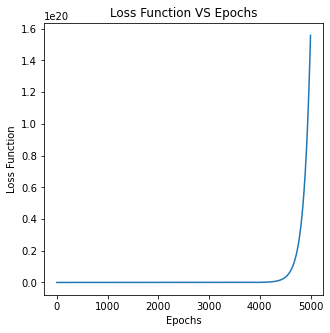

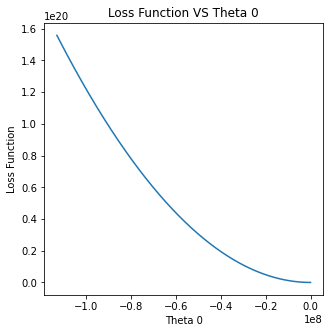

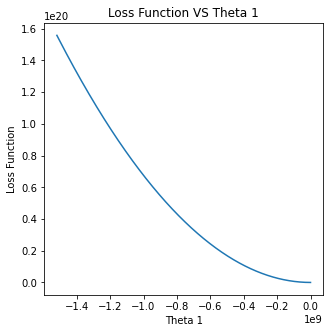

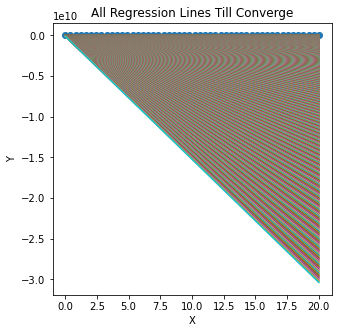

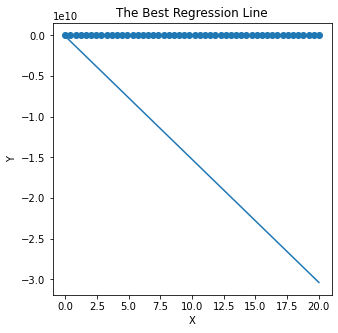

In [35]:
#Plots

#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

#### Trial 2

In [36]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Adam(x, y, 0.001, 0.9, 0.2, 10 ** -4, 1000)

In [37]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = -3788274568.186139
Theta 1 = -50928698227.82957
R2 Score = -2.9253925440379476


In [38]:
epochs = list(range(1, len(Loss_Function)+1))

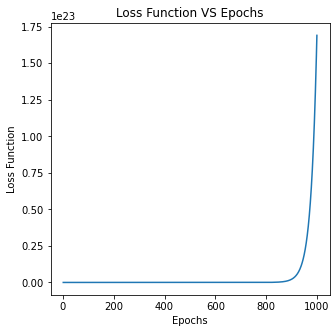

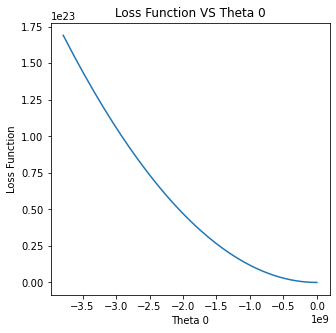

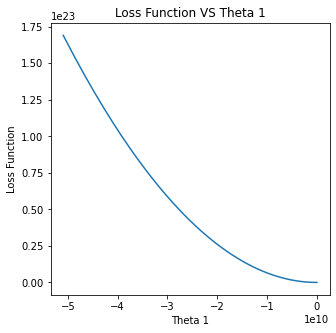

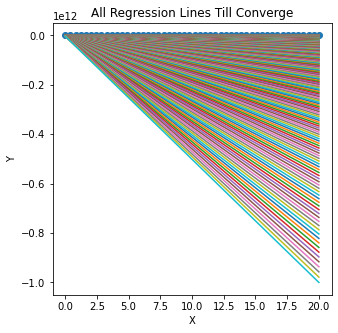

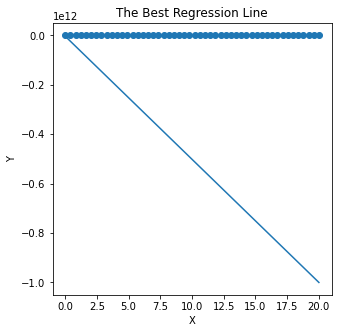

In [39]:
#Plots

#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

#### Trial 3

In [40]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Adam(x, y, 0.001, 0.5, 0.5, 10 ** -8, 10000)

In [41]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 2.0007729979301634
Theta 1 = -0.9998034349789637
R2 Score = 0.9999996883385481


In [42]:
epochs = list(range(1, len(Loss_Function)+1))

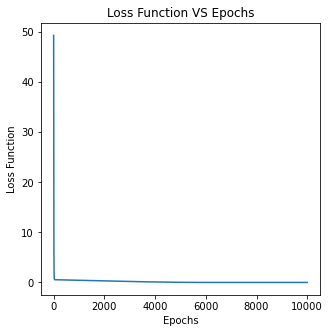

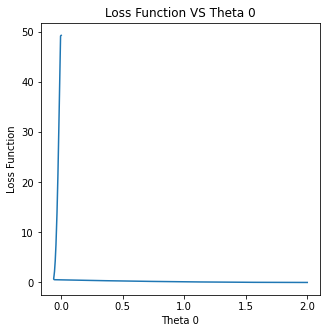

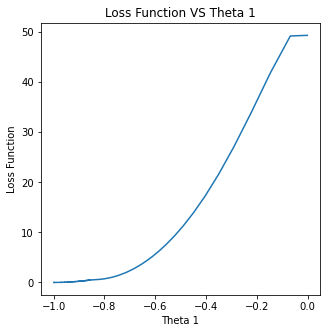

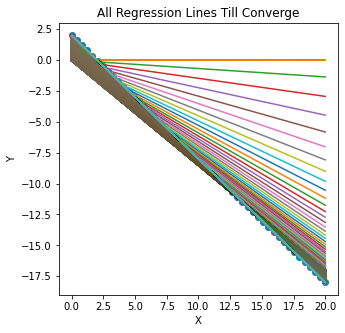

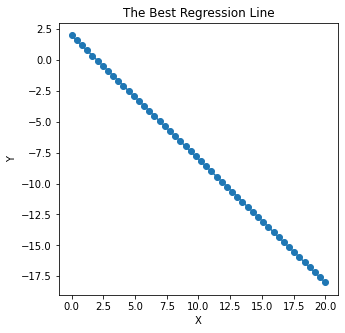

In [43]:
#Plots

#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

# Comparison

In [44]:
#Try Functions
theta_0_adag, theta_1_adag, Loss_Function_adag, thetas_0_adag, thetas_1_adag, h_adag, hs_adag = AdaGrad(x, y, 0.1, 10 ** -8, 3000)

theta_0_RMSProp, theta_1_RMSProp, Loss_Function_RMSProp, thetas_0_RMSProp, thetas_1_RMSProp, h_RMSProp, hs_RMSProp = RMSProp(x, y, 0.1, 0.9, 10 ** -8, 3000)

theta_0_adam, theta_1_adam, Loss_Function_adam, thetas_0_adam, thetas_1_adam, h_adam, hs_adam = Adam(x, y, 0.1, 0.9, 0.01, 10 ** -8, 3000)

In [45]:
#Results

print("All Algorithms with the same values as following:")
print("Learing Rate = 0.1 ")
print("Epsolin = 10^-8")
print("Max Number of Epochs = 3000 ")

print("\nAdaGrad Algorithm")
print(f'Theta 0 = {theta_0_adag}')
print(f'Theta 1 = {theta_1_adag}')

r2 = r2_score(h_adag , y)
print(f'R2 Score = {r2}')

print("\nRMSProp Algorithm")
print(f'Theta 0 = {theta_0_RMSProp}')
print(f'Theta 1 = {theta_1_RMSProp}')

r2 = r2_score(h_RMSProp , y)
print(f'R2 Score = {r2}')

print("\nAdam Algorithm")
print(f'Theta 0 = {theta_0_adam}')
print(f'Theta 1 = {theta_1_adam}')

r2 = r2_score(h_adam , y)
print(f'R2 Score = {r2}')

All Algorithms with the same values as following:
Learing Rate = 0.1 
Epsolin = 10^-8
Max Number of Epochs = 3000 

AdaGrad Algorithm
Theta 0 = 1.8805348349820197
Theta 1 = -0.9909195573654694
R2 Score = 0.9998916903609811

RMSProp Algorithm
Theta 0 = 1.9500000009090894
Theta 1 = -1.0499999999308884
R2 Score = 0.9875688447780838

Adam Algorithm
Theta 0 = -4.846083275004775e+97
Theta 1 = -6.514963691111531e+98
R2 Score = -2.9253925441825306


In [46]:
def plot(Loss_Function, thetas_0, thetas_1, hs, h):
    
    epochs = list(range(1, len(Loss_Function)+1))
    
    #Loss Function VS Epochs
    plt.figure(figsize=(5, 5));
    plt.xlabel('Epochs');
    plt.ylabel('Loss Function');
    plt.title('Loss Function VS Epochs');
    plt.plot(epochs, Loss_Function);

    #Loss Function VS Theta 0
    plt.figure(figsize=(5, 5));
    plt.xlabel('Theta 0');
    plt.ylabel('Loss Function');
    plt.title('Loss Function VS Theta 0');
    plt.plot(thetas_0, Loss_Function);

    #Loss Function VS Theta 1
    plt.figure(figsize=(5, 5));
    plt.xlabel('Theta 1');
    plt.ylabel('Loss Function');
    plt.title('Loss Function VS Theta 1');
    plt.plot(thetas_1, Loss_Function);

    #All Regression Lines Till Converge
    plt.figure(figsize=(5, 5));
    plt.scatter(x,y)
    plt.xlabel('X');
    plt.ylabel('Y');
    plt.title('All Regression Lines Till Converge');
    for i in hs:
        plt.plot(x, i)

    #The Best Regression Line
    plt.figure(figsize=(5, 5));
    plt.scatter(x,y)
    plt.xlabel('X');
    plt.ylabel('Y');
    plt.title('The Best Regression Line');
    plt.plot(x, h);

Plots for AdaGrad Algorithm

Plots for RMSProp Algorithm

Plots for Adam Algorithm


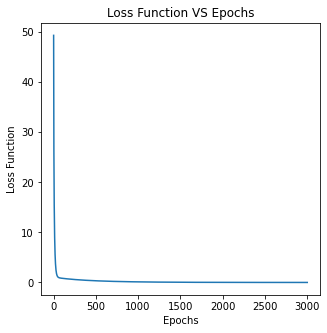

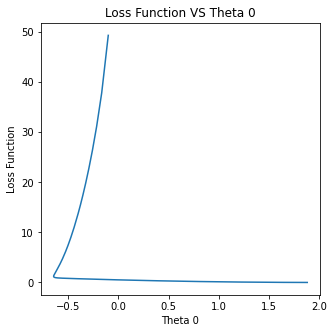

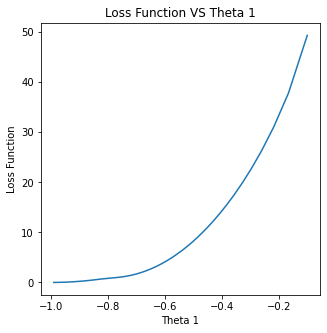

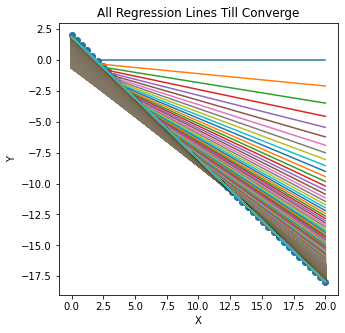

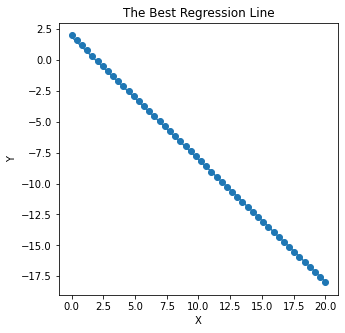

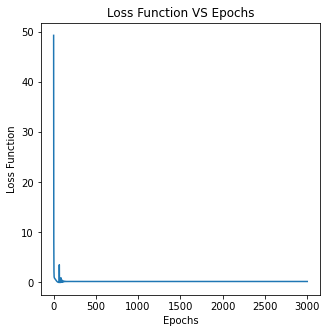

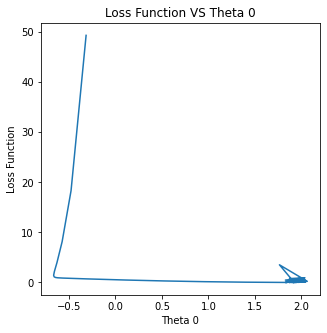

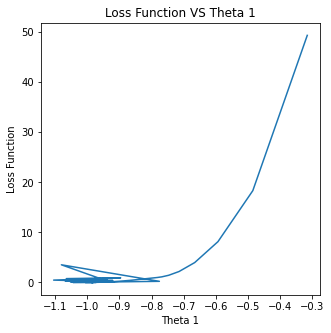

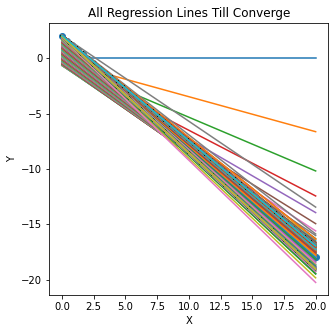

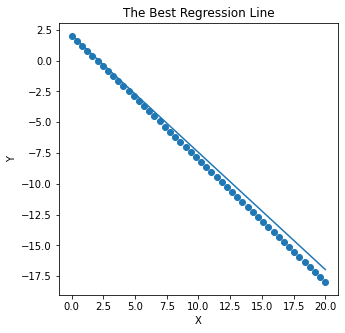

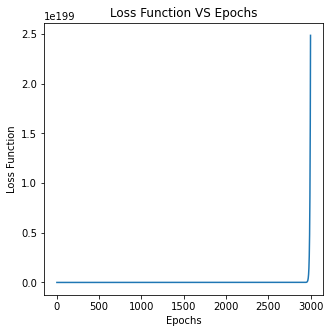

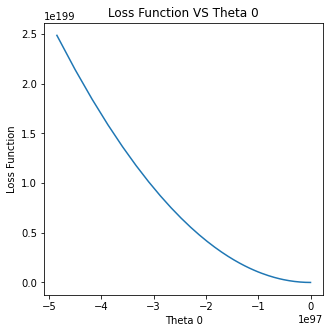

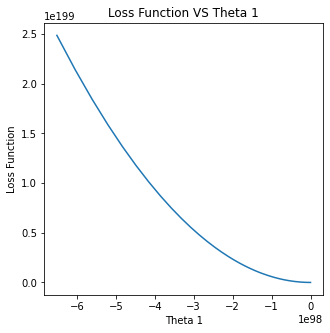

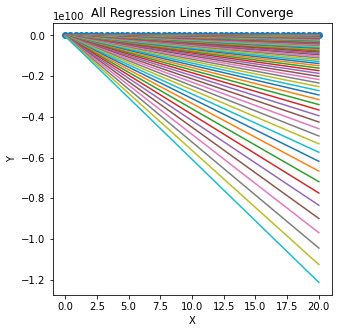

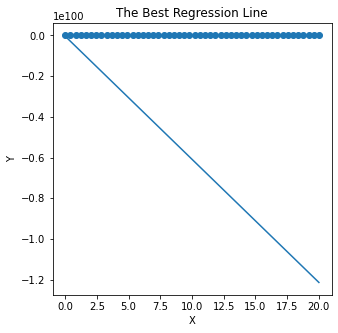

In [47]:
#Plots
print("Plots for AdaGrad Algorithm")
plot(Loss_Function_adag, thetas_0_adag, thetas_1_adag, hs_adag, h_adag)

print("\nPlots for RMSProp Algorithm")
plot(Loss_Function_RMSProp, thetas_0_RMSProp, thetas_1_RMSProp, hs_RMSProp, h_RMSProp)

print("\nPlots for Adam Algorithm")
plot(Loss_Function_adam, thetas_0_adam, thetas_1_adam, hs_adam, h_adam)

### Final Conclusion

The three algorithms works well to get the accurate parameters (Theta 0 and Theta 1) but with changing the algorithm parameters and with some considerations, such as:
- AdaGrad Algorithm best works with high relative learning rate according to RMSProp and Adam.
- Adam Algorithms best works with low relative learning rate according to RMSProp and AdaGrad and that's becaiuse of the Mt terms.
- there's no best algorithm, each one works in its best conditions.

`Finally, I got the pleasure to get this course with you Eng Hatem.
I learnt a lot from you. Thanks a lot for your appreciated efforts.`

## Congratulations 
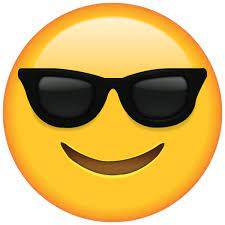